### Manipulação de Dados com Pandas - Parte 1

In [2]:
# Pandas é uma biblioteca para uso em Python, open-source e de uso gratuito (sob uma licença BSD), que fornece ferramentas para 
# análise e manipulação de dados.
import pandas as pd

In [3]:
# Instala a versão exacta do pacote
# !pip install -q pandas==2.0.0

In [4]:
pd.__version__

'2.0.0'

### Manipulando Dados em Dataframes do Pandas

In [5]:
# Cria um dicionário
dados = {'Estado': ['Santa Catarina', 'Rio de Janeiro', 'Tocantins', 'Bahia', 'Minas Gerais'], 
         'Ano': [2004, 2005, 2006, 2007, 2008],
         'Taxa Desemprego': [1.5, 1.7, 1.6, 2.4, 2.7]}

In [6]:
print(dados)

{'Estado': ['Santa Catarina', 'Rio de Janeiro', 'Tocantins', 'Bahia', 'Minas Gerais'], 'Ano': [2004, 2005, 2006, 2007, 2008], 'Taxa Desemprego': [1.5, 1.7, 1.6, 2.4, 2.7]}


In [7]:
# Importa a função Dataframe do Pandas
# Os DataFrames são objetos bidimensionais, de tamanho variável. O seu formato é de uma tabela, onde os dados são organizados em linhas e colunas.
from pandas import DataFrame

In [8]:
# Converte um dicionário em um dataframe
df = DataFrame(dados)

In [9]:
# Ao aplicar pandas em um dicionário o pandas irá transformar as chaves em colunas e os valores em linhas.
# Visualiza as 5 primeiras linhas
df.head()

,Estado,Ano,Taxa Desemprego
0,Santa Catarina,2004,1.5
1,Rio de Janeiro,2005,1.7
2,Tocantins,2006,1.6
3,Bahia,2007,2.4
4,Minas Gerais,2008,2.7


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
# Reorganizando as colunas
DataFrame(dados, columns = ['Estado', 'Taxa Desemprego', 'Ano'])

,Estado,Taxa Desemprego,Ano
0,Santa Catarina,1.5,2004
1,Rio de Janeiro,1.7,2005
2,Tocantins,1.6,2006
3,Bahia,2.4,2007
4,Minas Gerais,2.7,2008


In [11]:
# Criando outro dataframe com os mesmos dados anteriores mas adicionando uma coluna e alterando o índice
df2 = DataFrame(dados,
                columns = ['Estado', 'Taxa Desemprego', 'Taxa Crescimento', 'Ano'], 
                index = ['estado1', 'estado2', 'estado3', 'estado4', 'estado5'])

In [12]:
df2

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,Santa Catarina,1.5,NaN,2004
estado2,Rio de Janeiro,1.7,NaN,2005
estado3,Tocantins,1.6,NaN,2006
estado4,Bahia,2.4,NaN,2007
estado5,Minas Gerais,2.7,NaN,2008


In [13]:
# Mostrando os valores do dicionário (linhas)
df2.values

array([['Santa Catarina', 1.5, nan, 2004],
       ['Rio de Janeiro', 1.7, nan, 2005],
       ['Tocantins', 1.6, nan, 2006],
       ['Bahia', 2.4, nan, 2007],
       ['Minas Gerais', 2.7, nan, 2008]], dtype=object)

In [14]:
# Mostrando o tipo de dados de cada coluna
df2.dtypes

Estado               object
Taxa Desemprego     float64
Taxa Crescimento     object
Ano                   int64
dtype: object

In [15]:
# Mostrando as colunas do dataframe
df2.columns

Index(['Estado', 'Taxa Desemprego', 'Taxa Crescimento', 'Ano'], dtype='object')

In [16]:
# Imprimindo os dados de uma coluna apenas
df2['Estado']

estado1    Santa Catarina
estado2    Rio de Janeiro
estado3         Tocantins
estado4             Bahia
estado5      Minas Gerais
Name: Estado, dtype: object

In [17]:
# Imprimindo apenas 2 colunas do dataframe
df2[['Taxa Desemprego', 'Ano']]

,Taxa Desemprego,Ano
estado1,1.5,2004
estado2,1.7,2005
estado3,1.6,2006
estado4,2.4,2007
estado5,2.7,2008


In [18]:
df2.index

Index(['estado1', 'estado2', 'estado3', 'estado4', 'estado5'], dtype='object')

In [19]:
# Filtrando pelo indice
df2.filter(items = ['estado3'], axis = 0)

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado3,Tocantins,1.6,NaN,2006


### Usando Numpy e Pandas para a Manipulação de Dados

In [20]:
df2.head()

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,Santa Catarina,1.5,NaN,2004
estado2,Rio de Janeiro,1.7,NaN,2005
estado3,Tocantins,1.6,NaN,2006
estado4,Bahia,2.4,NaN,2007
estado5,Minas Gerais,2.7,NaN,2008


In [21]:
df2.dtypes

Estado               object
Taxa Desemprego     float64
Taxa Crescimento     object
Ano                   int64
dtype: object

In [22]:
# Resumo estatístico no DataFrame. Não aparece a coluna Taxa Crescimento pois essa coluna é formada por valores ausentes
df2.describe()

,Taxa Desemprego,Ano
count,5.000000,5.000000
mean,1.980000,2006.000000
std,0.535724,1.581139
min,1.500000,2004.000000
25%,1.600000,2005.000000
50%,1.700000,2006.000000
75%,2.400000,2007.000000
max,2.700000,2008.000000


In [23]:
# Verificando as colunas com valores ausentes
# A coluna Taxa Crescimento tem valor boleano True para valores ausentes nas 5 linhas que a compõem
df2.isna()

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,False,False,True,False
estado2,False,False,True,False
estado3,False,False,True,False
estado4,False,False,True,False
estado5,False,False,True,False


In [24]:
# Verificando de modo separado a Taxa Crescimento/ isna devolve valor booleano
df2['Taxa Crescimento'].isna()

estado1    True
estado2    True
estado3    True
estado4    True
estado5    True
Name: Taxa Crescimento, dtype: bool

In [25]:
# NAN é um problema e deve ser resolvido.
# Para isso começamos por importar o Numpy para prencher os dados usando a função arange()
import numpy as np

In [26]:
# Usando o numpy para alimentar uma das colunas do DataFrame
df2['Taxa Crescimento'] = np.arange(5.)

In [27]:
# Imprime DataFrame
df2

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,Santa Catarina,1.5,0.0,2004
estado2,Rio de Janeiro,1.7,1.0,2005
estado3,Tocantins,1.6,2.0,2006
estado4,Bahia,2.4,3.0,2007
estado5,Minas Gerais,2.7,4.0,2008


In [28]:
df2.dtypes

Estado               object
Taxa Desemprego     float64
Taxa Crescimento    float64
Ano                   int64
dtype: object

In [29]:
df2['Taxa Crescimento'].isna()

estado1    False
estado2    False
estado3    False
estado4    False
estado5    False
Name: Taxa Crescimento, dtype: bool

In [30]:
# Resumo Estatístico do DataFrame
# A Taxa Crescimento já aparece pois os seus dados já não são Not Available(NA)
df2.describe()

,Taxa Desemprego,Taxa Crescimento,Ano
count,5.000000,5.000000,5.000000
mean,1.980000,2.000000,2006.000000
std,0.535724,1.581139,1.581139
min,1.500000,0.000000,2004.000000
25%,1.600000,1.000000,2005.000000
50%,1.700000,2.000000,2006.000000
75%,2.400000,3.000000,2007.000000
max,2.700000,4.000000,2008.000000


### Slicing de DataFrames

In [31]:
df2

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,Santa Catarina,1.5,0.0,2004
estado2,Rio de Janeiro,1.7,1.0,2005
estado3,Tocantins,1.6,2.0,2006
estado4,Bahia,2.4,3.0,2007
estado5,Minas Gerais,2.7,4.0,2008


In [32]:
# O Slicing com dataframes pode ser feito com strings e é sempre inclusivo em relação ao último valor
df2['estado2':'estado4']

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado2,Rio de Janeiro,1.7,1.0,2005
estado3,Tocantins,1.6,2.0,2006
estado4,Bahia,2.4,3.0,2007


In [33]:
# Imprimir dados onde Taxa Desemprego é menor que 2
df2[ df2['Taxa Desemprego'] < 2 ]

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,Santa Catarina,1.5,0.0,2004
estado2,Rio de Janeiro,1.7,1.0,2005
estado3,Tocantins,1.6,2.0,2006


In [34]:
# Imprimir dados onde o ano é igual a 2004
df2[df2['Ano'] == 2004 ]

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,Santa Catarina,1.5,0.0,2004


In [35]:
# Imprime dados da coluna Taxa Crescimento
df2['Taxa Crescimento']

estado1    0.0
estado2    1.0
estado3    2.0
estado4    3.0
estado5    4.0
Name: Taxa Crescimento, dtype: float64

In [36]:
# Imprimir dados de 2 colunas
df2[['Estado', 'Taxa Crescimento']]

,Estado,Taxa Crescimento
estado1,Santa Catarina,0.0
estado2,Rio de Janeiro,1.0
estado3,Tocantins,2.0
estado4,Bahia,3.0
estado5,Minas Gerais,4.0


In [37]:
# Imprimir dados de 3 colunas
df2[['Estado', 'Taxa Crescimento', 'Ano']]

,Estado,Taxa Crescimento,Ano
estado1,Santa Catarina,0.0,2004
estado2,Rio de Janeiro,1.0,2005
estado3,Tocantins,2.0,2006
estado4,Bahia,3.0,2007
estado5,Minas Gerais,4.0,2008


### Prenchendo Valores Ausentes em DataFrames do Pandas

A função fillna() é usada para preencher os valores ausentes. A função oferece muitas opções. Podemos usar um valor específico, uma função agregada (por exemplo, média) ou o valor anterior ou seguinte.

Para esse exemplo usaremos a moda, a estatística que representa o valor que aparece mais vezes em uma variável.

In [38]:
# Primeiro importamos o dataset
dsa_df = pd.read_csv("dataset.csv")

In [39]:
dsa_df.head(15)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,NaN
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,NaN
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
6,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AR-10002833,Office Supplies,Newell 322,7.2800,4.0
7,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,TEC-PH-10002275,Technology,Mitel 5320 IP Phone VoIP phone,907.1520,6.0
8,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-BI-10003910,Office Supplies,DXL Angle-View Binders with Locking Rings by S...,18.5040,3.0
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0


In [40]:
# Verifica se o dataset possui valores NA
dsa_df.isna()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False


In [41]:
# Devolve de maneira resumida as colunas com NA
dsa_df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Regiao          0
ID_Produto      0
Categoria       0
Nome_Produto    0
Valor_Venda     0
Quantidade      2
dtype: int64

In [42]:
# Extraímos a moda da coluna Quantidade
moda = dsa_df['Quantidade'].value_counts().index[0]

A moda em Estatística é uma medida de tendência central que representa o valor mais frequente em um conjunto de dados.

A moda é especialmente útil quando queremos saber qual é o valor mais comum ou popular em um conjunto de dados, seja em uma distribuição unimodal (com apenas uma moda) ou em uma distribuição bimodal (com duas modas).

No entanto, a moda pode não ser tão representativa quanto outras medidas de tendência central, como a média e a mediana, especialmente em distribuições assimétricas ou quando há valores extremos. Por essa razão, é importante analisar diferentes medidas de tendência central e usar a que melhor se adequa aos objetivos da análise estatística.

In [43]:
print(moda)

3.0


In [44]:
# E por fim preenchemos os valores NA com a moda
dsa_df['Quantidade'].fillna(value = moda, inplace = True)

In [45]:
dsa_df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Regiao          0
ID_Produto      0
Categoria       0
Nome_Produto    0
Valor_Venda     0
Quantidade      0
dtype: int64

In [46]:
dsa_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0


In [47]:
# Checamos o valor mínimo e máximo da coluna Valor_Venda
dsa_df.Valor_Venda.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Valor_Venda, dtype: float64

O intervalo de vendas (Valor_Venda) é de 0.44 a 22638. Vamos fazer uma consulta e retornar todas as vendas dentro de um range de valores. Fazemos isso com a instrução abaixo:

In [48]:
df2 = dsa_df.query('229 < Valor_Venda < 10000')

In [49]:
df2.Valor_Venda.describe()

count    2357.000000
mean      766.679142
std       856.315136
min       229.544000
25%       323.100000
50%       490.320000
75%       859.200000
max      9892.740000
Name: Valor_Venda, dtype: float64

In [50]:
df2.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
7,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,TEC-PH-10002275,Technology,Mitel 5320 IP Phone VoIP phone,907.1520,6.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0


In [51]:
df3 = dsa_df.query('Valor_Venda > 776')

In [52]:
df3.Valor_Venda.describe()

count      680.000000
mean      1730.142247
std       1713.851567
min        776.850000
25%        934.601000
50%       1235.682500
75%       1799.970000
max      22638.480000
Name: Valor_Venda, dtype: float64

In [53]:
df3.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
7,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,TEC-PH-10002275,Technology,Mitel 5320 IP Phone VoIP phone,907.1520,6.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
11,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,TEC-PH-10002033,Technology,Konftel 250 Conference phone - Charcoal black,911.4240,4.0
24,CA-2015-106320,2015-09-25,EB-13870,Consumer,United States,West,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3.0


### Verificando a Ocorrência de Diversos Valores em uma Única Coluna

Vamos usar o método isin() para saber em quais vendas foram vendidos 5, 7, 9 ou 11 itens.

In [54]:
dsa_df.shape

(9994, 11)

In [55]:
# Então aplicamos o filtro
dsa_df[dsa_df['Quantidade'].isin([5,7,9,11])]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
14,US-2015-118983,2015-11-22,HP-14815,Home Office,United States,Central,OFF-AP-10002311,Office Supplies,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0
...,...,...,...,...,...,...,...,...,...,...,...
9974,US-2016-103674,2016-12-06,AP-10720,Home Office,United States,West,OFF-AR-10004752,Office Supplies,Blackstonian Pencils,18.6900,7.0
9977,US-2016-103674,2016-12-06,AP-10720,Home Office,United States,West,OFF-FA-10003467,Office Supplies,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7.0
9981,CA-2017-163566,2017-08-03,TB-21055,Consumer,United States,East,OFF-LA-10004484,Office Supplies,Avery 476,16.5200,5.0
9982,US-2016-157728,2016-09-22,RC-19960,Consumer,United States,Central,OFF-PA-10002195,Office Supplies,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.5600,7.0


In [56]:
dsa_df[dsa_df['Quantidade'].isin([5,7,9,11])].shape

(2128, 11)

In [57]:
# Retornando apenas 10 linhas
dsa_df[dsa_df['Quantidade'].isin([5,7,9,11])][:10]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
14,US-2015-118983,2015-11-22,HP-14815,Home Office,United States,Central,OFF-AP-10002311,Office Supplies,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0
21,CA-2016-137330,2016-12-09,KB-16585,Corporate,United States,Central,OFF-AR-10000246,Office Supplies,Newell 318,19.4600,7.0
22,CA-2016-137330,2016-12-09,KB-16585,Corporate,United States,Central,OFF-AP-10001492,Office Supplies,"Acco Six-Outlet Power Strip, 4' Cord Length",60.3400,7.0
27,US-2015-150630,2015-09-17,TB-21520,Consumer,United States,East,FUR-BO-10004834,Furniture,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7.0
35,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,TEC-PH-10004977,Technology,GE 30524EE4,1097.5440,7.0
36,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,FUR-FU-10003664,Furniture,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5.0


### Operadores Lógicos para Manipulação de Dados com Pandas

Os operadores lógicos são excelentes para filtrar dataframes e retornar exatamente os dados que precisamos para nosso trabalho. 

In [58]:
# Filtrando as vendas que ocorreram para o segmento de Home Office e na Região South
dsa_df[(dsa_df.Segmento == 'Home Office') & (dsa_df.Regiao == 'South') ].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
182,CA-2014-158274,2014-11-19,RM-19675,Home Office,United States,South,TEC-PH-10003273,Technology,AT&T TR1909W,503.9600,4.0
183,CA-2014-158274,2014-11-19,RM-19675,Home Office,United States,South,TEC-PH-10004896,Technology,Nokia Lumia 521 (T-Mobile),149.9500,5.0
184,CA-2014-158274,2014-11-19,RM-19675,Home Office,United States,South,TEC-AC-10002345,Technology,HP Standard 104 key PS/2 Keyboard,29.0000,2.0
231,US-2017-100930,2017-04-07,CS-12400,Home Office,United States,South,FUR-TA-10001705,Furniture,Bush Advantage Collection Round Conference Table,233.8600,2.0
232,US-2017-100930,2017-04-07,CS-12400,Home Office,United States,South,FUR-TA-10003473,Furniture,Bretford Rectangular Conference Table Tops,620.6145,3.0


Mas pode ser necessário checar duas condições e retornar os registros se pelo menos uma for verdadeira. Nesse caso usamos o operador OR, conforme abaixo.

In [59]:
# Filtrando as 5 últimas vendas que ocorreram para o segmento de Home Office ou Região South
dsa_df[(dsa_df.Segmento == 'Home Office') | (dsa_df.Regiao == 'South')].tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
9979,US-2016-103674,2016-12-06,AP-10720,Home Office,United States,West,OFF-BI-10002026,Office Supplies,Ibico Recycled Linen-Style Covers,437.472,14.0
9980,US-2015-151435,2015-09-06,SW-20455,Consumer,United States,South,FUR-TA-10001029,Furniture,KI Adjustable-Height Table,85.980,1.0
9987,CA-2017-163629,2017-11-17,RA-19885,Corporate,United States,South,TEC-AC-10001539,Technology,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1.0
9988,CA-2017-163629,2017-11-17,RA-19885,Corporate,United States,South,TEC-PH-10004006,Technology,Panasonic KX - TS880B Telephone,206.100,5.0
9989,CA-2014-110422,2014-01-21,TB-21400,Consumer,United States,South,FUR-FU-10001889,Furniture,Ultra Door Pull Handle,25.248,3.0


O operador de negação é o contrário do primeiro exemplo.

In [60]:
# Filtrando as vendas que não ocorreram para o segmento de Home Office e nem na Região South
# Sample devolve os elementos de forma aleatória
dsa_df[(dsa_df.Segmento != 'Home Office') & (dsa_df.Regiao != 'South')].sample(5)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
4931,CA-2017-143651,2017-03-25,FM-14215,Corporate,United States,West,OFF-AR-10001446,Office Supplies,Newell 309,23.100,2.0
1738,CA-2015-130204,2015-09-03,DB-13120,Corporate,United States,West,TEC-AC-10003038,Technology,Kingston Digital DataTraveler 16GB USB 2.0,17.900,2.0
5930,US-2017-169551,2017-07-07,RL-19615,Consumer,United States,East,OFF-PA-10004100,Office Supplies,Xerox 216,15.552,3.0
4721,CA-2014-106229,2014-06-07,NR-18550,Consumer,United States,Central,FUR-TA-10002041,Furniture,"Bevis Round Conference Table Top, X-Base",268.935,3.0
398,CA-2016-108987,2016-09-08,AG-10675,Consumer,United States,Central,OFF-ST-10001580,Office Supplies,Super Decoflex Portable Personal File,35.952,3.0


### Agrupamento de Dados em DataFrames com Group By

A função Pandas Groupby é uma função versátil e fácil de usar que ajuda a obter uma visão geral dos dados. Isso torna mais fácil explorar o conjunto de dados e revelar os relacionamentos entre as variáveis.

O código a seguir agrupará as linhas com base nas combinações Segmento/Regiao/Valor_Venda e nos dará a taxa média de vendas de cada grupo.

In [61]:
# Aplicamos o Group By
dsa_df[['Segmento', 'Regiao', 'Valor_Venda']].groupby(['Segmento', 'Regiao']).mean()

Valor_Venda
Segmento    Regiao              
Consumer    Central   207.946728
            East      238.875539
            South     233.390180
            West      217.033955
Corporate   Central   234.763466
            East      228.516929
            South     238.992025
            West      235.265911
Home Office Central   208.248046
            East      253.911805
            South     272.996329
            West      239.442692

Na instrução acima, primeiro filtramos os dados extraindo 3 colunas: ['Segmento','Regiao','Valor_Venda']. Na sequência, agrupamos por duas colunas: ['Segmento','Regiao']. E então calculamos a média para a coluna que ficou foram do group by, nesse caso a coluna Sales.

O comportamento do group by com Pandas é o mesmo observado na Linguagem SQL.

In [63]:
dsa_df[['Regiao', 'Segmento', 'Valor_Venda']].groupby(['Regiao', 'Segmento']).mean()

Valor_Venda
Regiao  Segmento                
Central Consumer      207.946728
        Corporate     234.763466
        Home Office   208.248046
East    Consumer      238.875539
        Corporate     228.516929
        Home Office   253.911805
South   Consumer      233.390180
        Corporate     238.992025
        Home Office   272.996329
West    Consumer      217.033955
        Corporate     235.265911
        Home Office   239.442692

### Agregação Múltipla com Group By

Vamos explorar mais a função groupby() pois temos diversas opções de sumarização dos dados de forma simples. No exemplo abaixo uniremos a função groupby() com a função agg() para realizar agregação múltipla.

In [64]:
# Aplicamos o group by
dsa_df[['Segmento', 'Regiao', 'Valor_Venda']].groupby(['Segmento', 'Regiao']).agg(['mean', 'std', 'count'])

Valor_Venda                   
                           mean          std count
Segmento    Regiao                                
Consumer    Central  207.946728   587.906523  1212
            East     238.875539   633.371169  1469
            South    233.390180   559.346824   838
            West     217.033955   551.997547  1672
Corporate   Central  234.763466   818.947521   673
            East     228.516929   530.001654   877
            South    238.992025   586.176947   510
            West     235.265911   471.288764   960
Home Office Central  208.248046   371.009180   438
            East     253.911805   722.777318   502
            South    272.996329  1404.798466   272
            West     239.442692   529.242737   571

Na instrução acima, primeiro filtramos os dados extraindo 3 colunas: ['Segmento','Regiao','Valor_Venda']. Na sequência, agrupamos por duas colunas: ['Segmento','Regiao']. E então agregamos os dados calculando a média, desvio padrão e contagem de elementos para a coluna que ficou fora do group by, nesse caso a coluna Valor_Venda.

A função agg() recebe como argumento uma lista de funções para agregação.

### Filtrando DataFrame do Pandas com Base em Strings

O Pandas oferece diversas funções para manipulação de strings. Começaremos com o filtros de strings com base nas letras iniciais e finais.

In [65]:
dsa_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0


In [66]:
# Filtramos o dataframe pela coluna Segmento com valores que iniciam com as letras 'Con'
dsa_df[dsa_df.Segmento.str.startswith('Con')].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0


In [67]:
dsa_df.Segmento.value_counts()

Segmento
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [68]:
# Filtramos o dataframe pela coluna Segmento com valores que terminam com as letras 'mer'
dsa_df[dsa_df.Segmento.str.endswith('mer')].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0


As funções startswith() e endswith() são muito úteis quando for necessário filtrar strings por caracteres que apareçam no começo e/ou final.

### Split de Strings em DataFrames do Pandas

Com Pandas podemos realizar diversas tarefas de split de strings dividindo uma coluna ou extraindo elementos do nosso interesse. Vamos ao exemplo!

In [69]:
dsa_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0


In [70]:
dsa_df['ID_Pedido'].head()

0    CA-2016-152156
1    CA-2016-152156
2    CA-2016-138688
3    US-2015-108966
4    US-2015-108966
Name: ID_Pedido, dtype: object

Este é o formato dos dados da coluna "ID_Pedido":

CA-2016-152156
US-2015-108966
Temos o país, o ano e o id do pedido. Vamos dividir essa coluna e extrair o ano para gravar em uma nova coluna:

In [71]:
# Split da coluna pelo caracter '-'
dsa_df['ID_Pedido'].str.split('-')

0       [CA, 2016, 152156]
1       [CA, 2016, 152156]
2       [CA, 2016, 138688]
3       [US, 2015, 108966]
4       [US, 2015, 108966]
               ...        
9989    [CA, 2014, 110422]
9990    [CA, 2017, 121258]
9991    [CA, 2017, 121258]
9992    [CA, 2017, 121258]
9993    [CA, 2017, 119914]
Name: ID_Pedido, Length: 9994, dtype: object

Observe que o resultado são as listas em Python. Para extrair o ano precisamos especificar o índice da posição que queremos extrair (em nosso caso a posição 2, logo, índice 1 em Python):

In [72]:
# Criamos a coluna Ano no DataFrame e Fazemos o split da coluna e extraímos o item na posição 2 (índice 1)
dsa_df['Ano'] = dsa_df['ID_Pedido'].str.split('-').str[1]

In [73]:
dsa_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015


### Strip de Strings em DataFrames do Pandas

Vimos o Split e agora veremos o Strip. São funções diferentes.

O Split divide a string. O Strip remove caracteres da string. Veja os exemplos.

In [75]:
dsa_df.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.96,3.0,2016
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3.0,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,2016


In [76]:
dsa_df['Data_Pedido'].head(3)

0    2016-11-08
1    2016-11-08
2    2016-06-12
Name: Data_Pedido, dtype: object

A coluna 'Data_Pedido' é a data de envio do produto no formato YYYY-MM-DD. Imagine que seja necessário deixar o ano apenas com 2 dígitos sem alterar o tipo da variável. Fazemos isso com a função lstrip(), ou seja, left strip.

In [77]:
# Vamos remover os dígitos 2 e 0 à esquerda do valor da variável 'Data_Pedido'
dsa_df['Data_Pedido'].str.lstrip('20')

0       16-11-08
1       16-11-08
2       16-06-12
3       15-10-11
4       15-10-11
          ...   
9989    14-01-21
9990    17-02-26
9991    17-02-26
9992    17-02-26
9993    17-05-04
Name: Data_Pedido, Length: 9994, dtype: object

Como não usamos o inplace = True a mudança é somente na memória e não altera o dataframe. Podemos usar ainda as funções rstrip() e strip() com diferentes variações de strip de strings.

In [78]:
dsa_df['Data_Pedido'].head(3)

0    2016-11-08
1    2016-11-08
2    2016-06-12
Name: Data_Pedido, dtype: object

### Replace de Strings em DataFrames do Pandas

Se for necessário substituir caracteres dentro de uma string o Pandas oferece uma função para isso também.

Por exemplo, vamos substituir 2 caracteres em uma das colunas.

In [79]:
dsa_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015


In [80]:
# Substituímos os caracteres CG por AX na coluna 'ID_Cliente'
dsa_df['ID_Cliente'] = dsa_df['ID_Cliente'].str.replace('CG', 'AX')

In [81]:
dsa_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano
0,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016
1,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015


### Combinação de Strings em DataFrames do Pandas

A função cat() pode ser usada para concatenar strings em um dataframe do Pandas.

Vamos criar uma nova coluna concatenando as colunas “ID_Pedido” e “Segmento” com o separador “-”.

In [82]:
dsa_df['Pedido_Segmento'] = dsa_df['ID_Pedido'].str.cat(dsa_df['Segmento'], sep = '-')

In [83]:
dsa_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano,Pedido_Segmento
0,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016,CA-2016-152156-Consumer
1,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016,CA-2016-152156-Consumer
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016,CA-2016-138688-Corporate
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015,US-2015-108966-Consumer
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015,US-2015-108966-Consumer


### Construção de Gráficos a partir de DataFrames do Pandas

Acompanhe os exemplos.

In [84]:
# Instala a versão exacta do Scikit-learn
# !pip install -q scikit-learn==1.2.2

In [85]:
import sklearn

In [86]:
sklearn.__version__

'1.4.2'

In [87]:
# Vamos começar importando o dataset iris do Scikit-learn
from sklearn.datasets import load_iris

In [88]:
data = load_iris()

In [89]:
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [90]:
# E então carregamos o dataset iris como dataframe do Pandas
import pandas as pd
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['spacies'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),spacies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

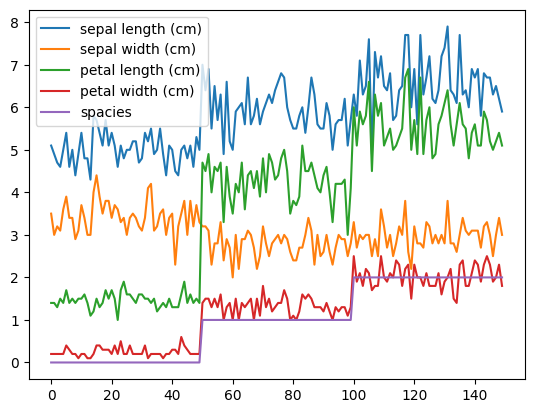

In [91]:
df.plot()

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

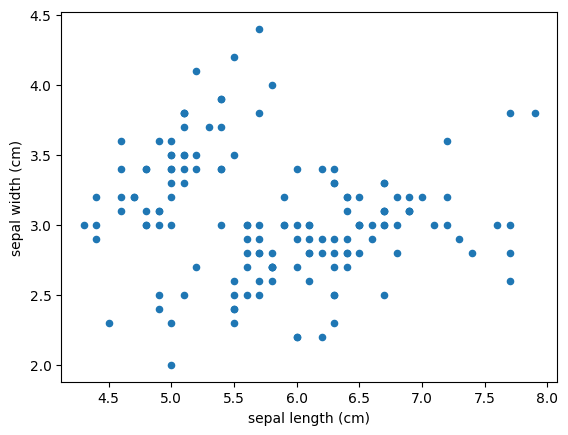

In [92]:
# Usar um Scatter plot com 2 variáveis
df.plot.scatter(x = 'sepal length (cm)', y = 'sepal width (cm)')

<Axes: >

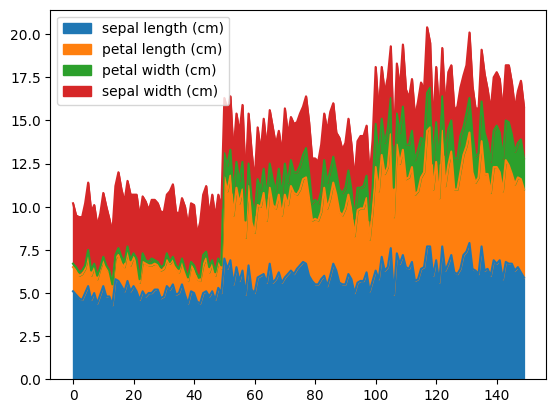

In [93]:
# E mesmo gráficos mais complexos como um gráfico de área, pode ser criado:
columns = ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)', 'sepal width (cm)']
df[columns].plot.area()

<Axes: xlabel='spacies'>

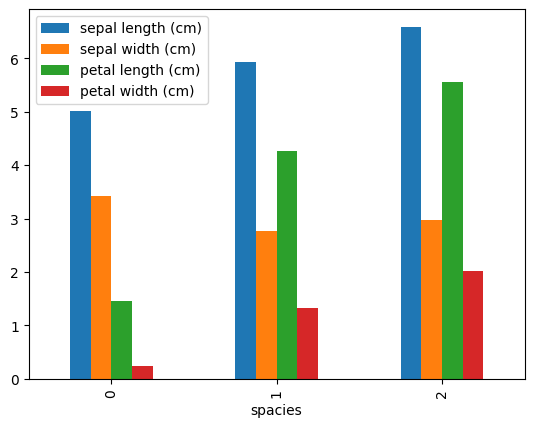

In [94]:
# Calculamos a média das colunas agrupando pela coluna spacies e criamos um gráfico com o resultado
df.groupby('spacies').mean().plot.bar()

<Axes: ylabel='sepal length (cm)'>

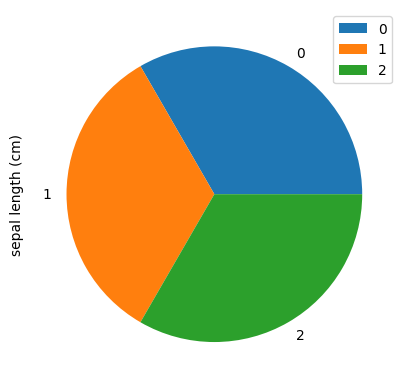

In [95]:
# Ou então, fazemos a contagem de classes da coluna spacies e plotamos em um gráfico de pizza
df.groupby('spacies').count().plot.pie(y = 'sepal length (cm)')

A lista de possibilidades é imensa. Aqui tem muitos outros exemplos:

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

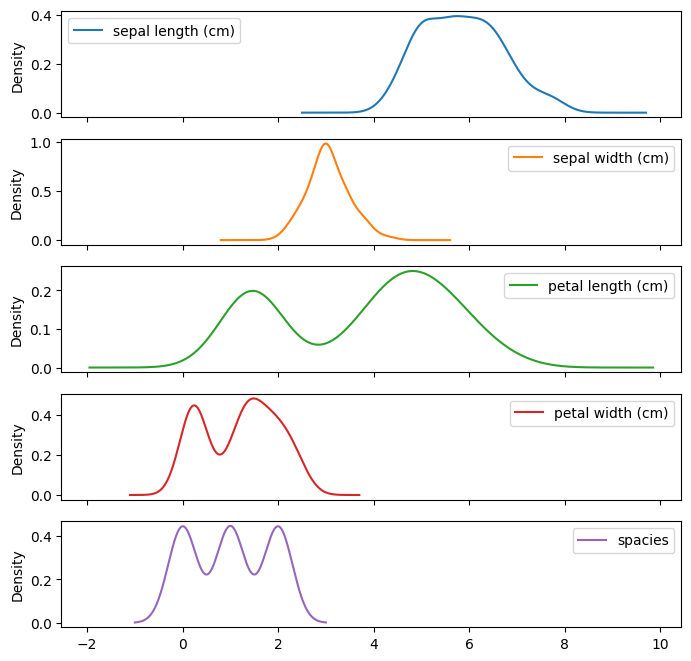

In [96]:
# Gráficos KDE (Kernel Density Function) para cada variável do dataframe
df.plot.kde(subplots = True, figsize = (8,8))

<Axes: >

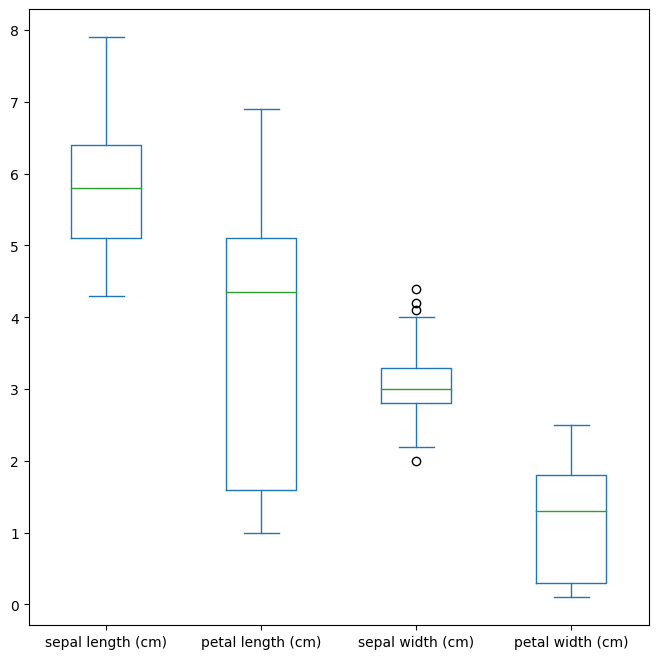

In [97]:
# Boxplot de cada variável numérica
columns = ['sepal length (cm)', 'petal length (cm)', 'sepal width (cm)', 'petal width (cm)']
df[columns].plot.box(figsize = (8,8))